<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">

</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала. Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий

# Занятие 2. Визуальный анализ данных
## Практическое задание. Визуальный анализ данных пассажиров "Титаника"

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv", index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Bostandyeff, Mr. Guentcho",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями.**

In [5]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)

In [6]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `SibSp` и `Parch` (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

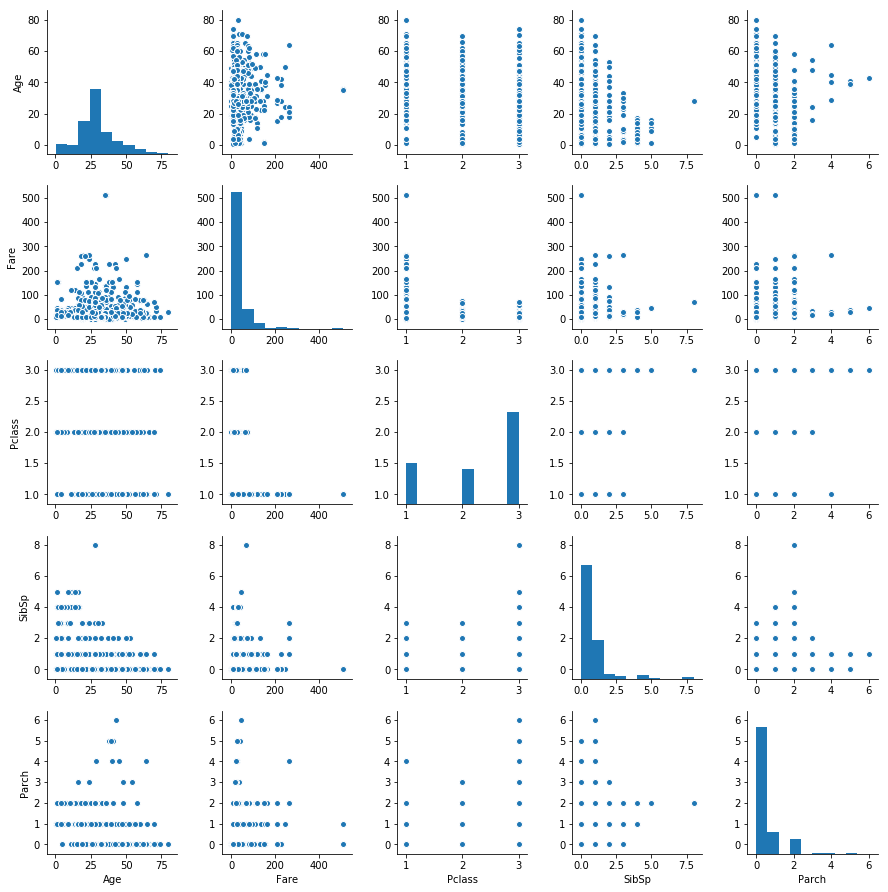

In [7]:
# Ваш код здесь
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']])

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

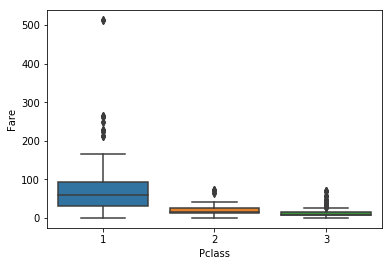

In [8]:
# Ваш код здесь
sns.boxplot(x='Pclass', y='Fare', data=train_df)

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` - стоимости без выбросов, в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: Надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [9]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

In [10]:
a1, b1 = fare_pclass1.mean() - 2*fare_pclass1.std(), fare_pclass1.mean() + 2*fare_pclass1.std()
a2, b2 = fare_pclass2.mean() - 2*fare_pclass2.std(), fare_pclass2.mean() + 2*fare_pclass2.std()
a3, b3 = fare_pclass3.mean() - 2*fare_pclass3.std(), fare_pclass3.mean() + 2*fare_pclass3.std()

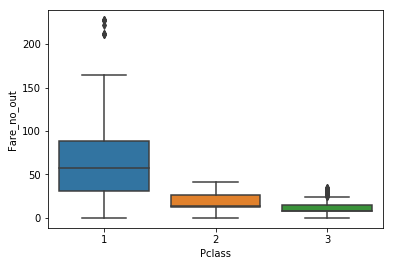

In [11]:
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 >= a1) & (fare_pclass1 <= b1)]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 >= a2) & (fare_pclass2 <= b2)]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 >= a3) & (fare_pclass3 <= b3)]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

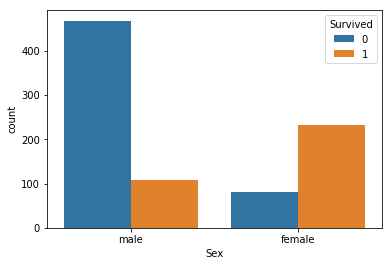

In [12]:
# Ваш код здесь
sns.countplot(x='Sex', hue='Survived', data=train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

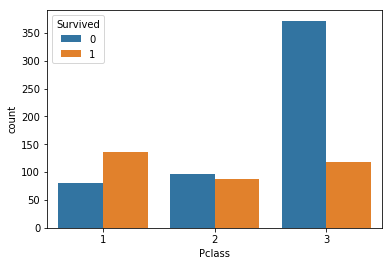

In [13]:
# Ваш код здесь
sns.countplot(x='Pclass', hue='Survived', data=train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

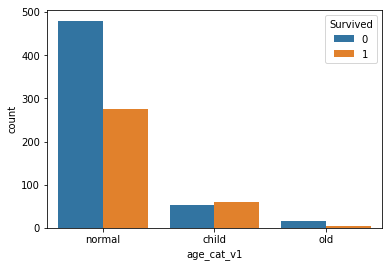

In [14]:
# Ваш код здесь
def age_category(age):
    if (age < 18): return 'child'
    if (age > 60): return 'old'
    return 'normal'

train_df['age_cat_v1'] = train_df['Age'].apply(age_category)
sns.countplot(x='age_cat_v1', hue='Survived', data=train_df)

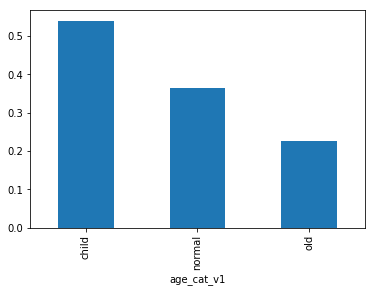

In [15]:
train_df.groupby('age_cat_v1')['Survived'].mean().plot(kind='bar')

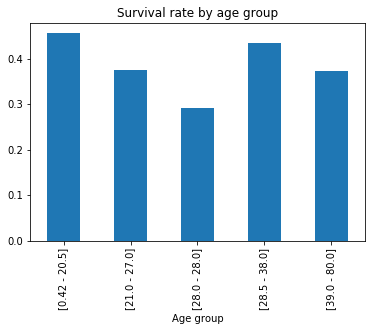

In [16]:
# Разбиваем на NUM_BINS примерно равных по размеру групп

NUM_BINS = 5

train_df['age_cat_v2'] = (train_df['Age'].rank(pct=True) * 0.99 * NUM_BINS).astype(int)
train_df.groupby('age_cat_v2')['Survived'].mean().plot(kind='bar')

# Adding labels
df_bins = train_df.groupby('age_cat_v2')['Age'].agg(['min', 'max'])
bins_names = ('[' + df_bins['min'].map(str) + ' - ' + df_bins['max'].map(str) + ']').values
plt.xticks(range(NUM_BINS), bins_names)
plt.xlabel('Age group');
plt.title('Survival rate by age group');